Skylar Stolte
BME6938
10/19/18
Homework 3

Note: I have updated my markdowns to be above the relevant code based on my MATLAB practices. 

Part a) Load the dataset in an iPython notebook [2 points].

The libraries that may be needed are inputed here. All needed packages are imported here based on personal preference concerning organizational schemes.

In [115]:
#import needed libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
%matplotlib inline

Here the data is imported and a preview is loaded for clarity. There are 62 rows that correspond to unique samples pertaining to Color Cancer. The first column ("0") corresponds to the classification as to whether the instance came from a tumor biopsy or not (0 or 1). The other columns (1-2000) correspond to input features relating to gene expressio levels. The file Genes.txt describes the relevant genes and tissues. 

Below, X is assigned to the columns 1-2000 to describe the input features and y is assigned to column 0 for class label. 

In [116]:
#read in data and check specifics
data = pd.read_csv('HW3Data.csv', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,0,2.080754,1.099069,0.927763,1.029081,-0.130763,1.265460,-0.436286,0.728881,2.107979,...,-0.825403,-0.138451,0.382957,0.876697,-0.216234,-1.408300,0.393327,-0.148522,1.591533,-0.217481
1,1,1.109457,0.786453,0.445560,-0.146323,-0.996316,0.555759,0.290734,-0.145259,1.132660,...,-1.056288,-0.205499,-1.815374,0.324373,-1.296909,-0.870757,1.108739,1.094010,-0.492141,-1.554079
2,0,-0.676530,1.693100,1.559247,1.559983,-0.982179,-1.358507,-1.313994,-0.455067,0.295214,...,1.242968,1.230157,-2.038999,2.366093,0.820656,1.404501,0.176860,-0.086285,-0.390878,-0.089465
3,1,0.534396,1.677537,1.489030,0.778605,-0.183776,-1.116850,-1.487557,-0.579511,0.292683,...,0.559852,-0.593149,-4.440577,1.720705,-0.124617,-0.435880,0.228440,-0.893938,1.005879,-0.631247
4,0,-1.018903,0.511080,0.755641,1.013816,0.529899,0.160440,-0.087055,1.295290,0.458736,...,0.227110,0.497628,-0.083921,-0.382733,-0.913389,1.122928,0.834571,-0.283786,-2.860340,0.280871


In [117]:
# assigning input features to X and class labels to y
X = data.loc[:,1:].values
y = data.loc[:,0].values

The input features are then standardized, which in general improves performance and aids in equal weighting between features that may fall on different scales. After standardization of X, the training and testing data is split 80/20 with stratification of y. Finally, the shapes of the training and testing sets are displayed to assure proper dimensions. 

In [118]:
# standardization of input features
X = StandardScaler().fit_transform(X)

In [119]:
#split the dataset into training and testing
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = .20, stratify = y, random_state = 1)

In [120]:
#test shapes to ensure that the data split correctly
print('The shape of X_train is:', X_train.shape)
print('The shape of X_test is:', X_test.shape)
print('The shape of y_train is:', y_train.shape)
print('The shape of y_test is:', y_test.shape)

The shape of X_train is: (49, 2000)
The shape of X_test is: (13, 2000)
The shape of y_train is: (49,)
The shape of y_test is: (13,)


Part b) Feature selection is an important machine learning task that allows us to select the  most important features in a given dataset. Scikit-learn provides multiple methods for choosing the best features. Use the Recursive Feature Elimination method (REF)
with cross-validation here, and show a plot to demonstrate the performance versus number of selected features [11 points]. 

Recursive feature elimination (RFE) uses cross validation to optimize the number of features selected. This method considers an increasingly smaller set of features used to assign weights to features when using an external estimator. The importance of each attribute is assigned as the estimator is trained on a set of features in which least important features are increasingly pruned until the optimal number of features is selected. 

Reference: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

Here, RFE is run and the cross-validation score is computed using the training set. This method is particularly helpful when the number of features is significantly greater than the number of instances (2000 vs. 62), as these cases are more at risk for overfitting. Below, the cross validation score versus the number of selected features is shown (RFECV results). 

In [121]:
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")

rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(10),
              scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 86


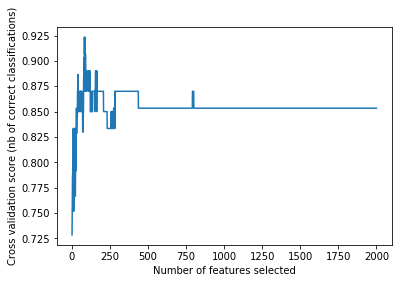

In [122]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Part c) Use the holdout method for testing using only the selected features. Report the performance. [5 points].

After the optimal number of features is determined, the SVM model is trained on the training data and run on the testing data using the selected number of features. 

In [123]:
# use the holdout method for testing using only the selected features:
svc.fit(X_train[:,rfecv.support_], y_train)
y_pred = svc.predict(X_test[:,rfecv.support_])
print('Test Accuracy: %.3f' % svc.score(X_test[:,rfecv.support_], y_test))

Test Accuracy: 0.769


Part d) Create a GitHub repository and share your code via GitHub with the instructor by submitting the link on Canvas [2 points]. 